In [ ]:
!pip install -U -q PyDrive
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
import numpy as np
import warnings
import cv2


SyntaxError: ignored

In [ ]:
import pandas as pd
import numpy as np
import warnings
#downloaded = drive.CreateFile({'id':id}) 
#downloaded.GetContentFile('FER2013')  
#data = pd.read_csv('FER2013', error_bad_lines=False)           # Dataset is now stored in a Pandas Dataframe named data

#warnings.filterwarnings("ignore")  #to ignore the filter warnings

data = pd.read_csv(r'/content/gdrive/MyDrive/Colab Notebooks/fer2013.csv')      #can't use this becaus the data cannot be taken from the local disk but it should be taken from drive

width, height = 48, 48 

datapoints = data['pixels'].tolist()    #tolist() = return a list of values
"""
datapoints is segregating the images from the fer2013 and returning list of images so that
it is easier to convert into array and separate the labels from the dataset
"""
#getting features for training
X = [] 
for xseq in datapoints:
    xx = [int(xp) for xp in xseq.split(' ')]
    xx = np.asarray(xx).reshape(width, height)
    X.append(xx.astype('float32'))    #Cast a pandas object to a specified dtype

X = np.asarray(X)                     #to convert input data into array
X = np.expand_dims(X, -1)             #Expand the shape of an array.  np.expand_dims(a, axis)

#getting labels for training
y = pd.get_dummies(data['emotion'])

#storing them using numpy
np.save('fdataX', X)
np.save('flabels', y)

print(datapoints[0]) #first datapoint(image) converted into a list 
print(X[0])          #first datapoint(image) in array form
print(y[0])          #label of the first datapoint(image)
print("Preprocessing Done")
print("Number of Features or Pixels of the image: "+str(len(X[0]))) #X[0] is the first image in our dataset, len(X[0]) = size
print("Number of Labels: "+ str(len(y[0])))
print("Number of examples in dataset:"+str(len(X)))
print("X,y stored in fdataX.npy and flabels.npy respectively")

70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92 

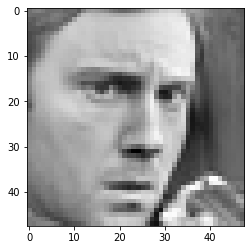

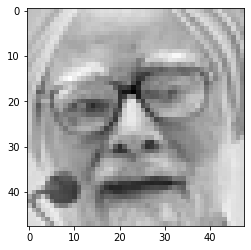

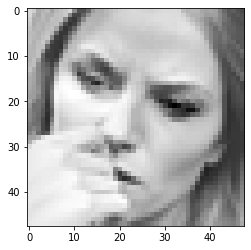

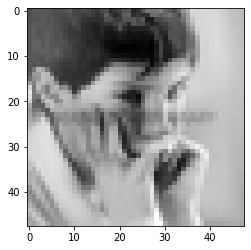

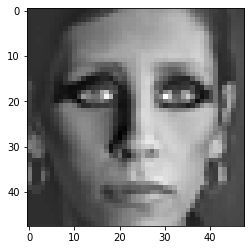

In [ ]:
import sys, os
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, MaxPool2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
import matplotlib.pyplot as plt

num_features = 64
num_labels = 7
batch_size = 64
epochs = 60
width, height = 48, 48

x = np.load('./fdataX.npy')
y = np.load('./flabels.npy')

x -= np.mean(x, axis=0)
x /= np.std(x, axis=0)

for xx in range(5):
    plt.figure(xx)
    plt.imshow(x[xx].reshape((48, 48)), interpolation='none', cmap='gray')
plt.show()

#splitting into training, validation and testing data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=41)

#saving the test samples to be used later
np.save('modXtest', X_test)
np.save('modytest', y_test)

In [ ]:
#desinging the CNN. Ours is VGG16
model = Sequential()
#input layer
model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))
model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))               #Dropout(dropout rate)

model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(2*2*2*num_features, activation='relu'))#Hidden layer
model.add(Dropout(0.4))
model.add(Dense(2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*num_features, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels, activation='softmax'))#Output Layer

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 128)       7

In [ ]:
#Compliling the model with adam optimixer and categorical crossentropy loss
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])

#training the model
model.fit(np.array(X_train), np.array(y_train),
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(np.array(X_valid), np.array(y_valid)))
          #shuffle=True)
model.summary()

#saving the  model to be used later
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer.h5")
print("Saved model to disk")

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/60
455/455 [==============================] - 39s 60ms/step - loss: 1.9913 - accuracy: 0.2148 - val_loss: 1.8229 - val_accuracy: 0.2594
Epoch 2/60
455/455 [==============================] - 25s 56ms/step - loss: 1.8338 - accuracy: 0.2453 - val_loss: 1.8001 - val_accuracy: 0.2610
Epoch 3/60
455/455 [==============================] - 26s 57ms/step - loss: 1.7639 - accuracy: 0.2804 - val_loss: 1.6908 - val_accuracy: 0.3009
Epoch 4/60
455/455 [==============================] - 27s 59ms/step - loss: 1.6322 - accuracy: 0.3476 - val_loss: 1.4819 - val_accuracy: 0.4031
Epoch 5/60
455/455 [==============================] - 26s 58ms/step - loss: 1.5307 - accuracy: 0.4004 - val_loss: 1.3988 - val_accuracy: 0.4384
Epoch 6/60
455/455 [==============================] - 26s 58ms/step - loss: 1.4628 - accuracy: 0.4267 - val_loss: 1.3974 - val_accuracy: 0.4458
Epoch 7/60
455/455 [==============================] - 27s 59ms/step - loss: 1.4184 - accuracy: 0.4539 - val_loss: 1.3269 - val_accuracy:

In [ ]:
# load json and create model......VIDEO
from __future__ import division
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os
import numpy as np

json_file = open('fer.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("fer.h5")
print("Loaded model from disk")

truey=[]
predy=[]
x = np.load('./modXtest.npy')
y = np.load('./modytest.npy')

yhat= loaded_model.predict(x)
yh = yhat.tolist()
yt = y.tolist()
count = 0

for i in range(len(y)):
    yy = max(yh[i])
    yyt = max(yt[i])
    predy.append(yh[i].index(yy))
    truey.append(yt[i].index(yyt))
    if(yh[i].index(yy)== yt[i].index(yyt)):
        count+=1

acc = (count/len(y))*100

#saving values for confusion matrix and analysis
np.save('truey', truey)
np.save('predy', predy)
print("Predicted and true label values saved")
print("Accuracy on test set :"+str(acc)+"%")

Loaded model from disk
113/113 [==============================] - 2s 10ms/step
Predicted and true label values saved
Accuracy on test set :66.09083310114238%


In [ ]:
# # load json and create model
# !apt-get -qq install -y libsm6 libxext6

# !pip install -q -U opencv-python
# #from __future__ import division
# exec('from __future__ import absolute_import, division, print_function')
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.models import model_from_json
# from keras.preprocessing import image
# import matplotlib.pyplot as plt
# import os
# import cv2
# import numpy as np
# #loading the model
# json_file = open('fer.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("fer.h5")
# print("Loaded model from disk")

# face_cascade = cv2.CascadeClassifier(r'/content/gdrive/MyDrive/Colab Notebooks/haarcascade_frontalface_default.xml')
# eye_cascade = cv2.CascadeClassifier(r'/content/gdrive/MyDrive/Colab Notebooks/haarcascade_eye.xml')
# #start video
# cap=cv2.VideoCapture(0)
# img_counter = 0
# while True:
#     ret,frame=cap.read()# captures frame and returns boolean value and captured image
#     if not ret:
#         continue
#     gray_img= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     k=cv2.waitKey(1)
#     face = face_cascade.detectMultiScale(gray_img,scaleFactor=1.5,minNeighbors=5,minSize=(30, 30),flags=cv2.CASCADE_SCALE_IMAGE
#     )

#     #draw rectangle around faces
#     for (x,y,w,h) in face:
#         cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),thickness=2)
#         roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
#         roi_gray=cv2.resize(roi_gray,(48,48))
        
#         img_pixels = image.img_to_array(roi_gray)
#         img_pixels = np.expand_dims(img_pixels, axis = 0)
#         img_pixels /= 255
#         '''
#         cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
#         prediction = model.predict(cropped_img)
#         '''
#         predictions = loaded_model.predict(img_pixels)
#         #find max indexed array
#         max_index = np.argmax(predictions[0])

#         emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
#         predicted_emotion = emotions[max_index]

#         cv2.putText(frame, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

#     resized_img = cv2.resize(frame, (700, 700))
#     cv2.imshow('Facial emotion analysis ',resized_img)
#     if k%256 == 27: #ESC Pressed
#         break
#     elif k%256 == 32:
#         # SPACE pressed
#         img_name = "facedetect_webcam_{}.png".format(img_counter)
#         cv2.imwrite(img_name, resized_img)
#         print("{} written!".format(img_name))
#         img_counter += 1
        

# # When everything is done, release the capture
# cap.release()
# cv2.destroyAllWindows()

In [ ]:
# # load json and create model.....IMAGE
# !apt-get -qq install -y libsm6 libxext6

# !pip install -q -U opencv-python
# #from __future__ import division
# exec('from __future__ import absolute_import, division, print_function')
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.models import model_from_json
# import matplotlib.pyplot as plt
# import os
# import cv2

# #loading the model
# json_file = open('fer.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("fer.h5")
# print("Loaded model from disk")

# face_cascade = cv2.CascadeClassifier(r'/content/gdrive/MyDrive/Colab Notebooks/haarcascade_frontalface_default.xml')
# eye_cascade = cv2.CascadeClassifier(r'/content/gdrive/MyDrive/Colab Notebooks/haarcascade_eye.xml')


# #setting image resizing parameters
# WIDTH = 48
# HEIGHT = 48
# x=None
# y=None
# labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# #loading image
# img1 = cv2.imread(r"C:\Users\Viraj\Desktop\abc.jpg")
# print("Image Loaded")
# gray = cv2.cvtColor( img1 , cv2.COLOR_BGR2GRAY)
# face = cv2.CascadeClassifier(r'/content/gdrive/MyDrive/Colab Notebooks/haarcascade_frontalface_default.xml')
# faces = face.detectMultiScale(gray,1.3,10)

# #detecting faces
# for (x, y, w, h) in faces:
#         roi_gray = gray[y:y + h, x:x + w]
#         cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
#         cv2.normalize(cropped_img, cropped_img, alpha=0, beta=1, norm_type=cv2.NORM_L2, dtype=cv2.CV_32F)
#         cv2.rectangle(img1, (x, y), (x + w, y + h), (0, 255, 0), 3)
#         roi_gray = gray[y:y+h, x:x+w]
#         roi_color = img1[y:y+h, x:x+w]
#         #predicting the emotion
#         yhat= loaded_model.predict(cropped_img)
#         cv2.putText(img1, labels[int(np.argmax(yhat))], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 3, cv2.LINE_AA)
#         print("Emotion: "+labels[int(np.argmax(yhat))])
#         eyes = eye_cascade.detectMultiScale(roi_gray)
#         for (ex,ey,ew,eh) in eyes:
#             cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,0,0),5) # (roi_color, (xstarting_coord,ystarting_coord),(x_ending_coord,y_ending_coord),thickness)

# plt.imshow(img1)
# plt.show()
# cv2.waitKey()


In [ ]:
# load json and create model
!apt-get -qq install -y libsm6 libxext6

!pip install -q -U opencv-python
#from __future__ import division
exec('from __future__ import absolute_import, division, print_function')
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
from keras.preprocessing import image
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np

Loaded model from disk


<IPython.core.display.Javascript object>

Saved to photo.jpg


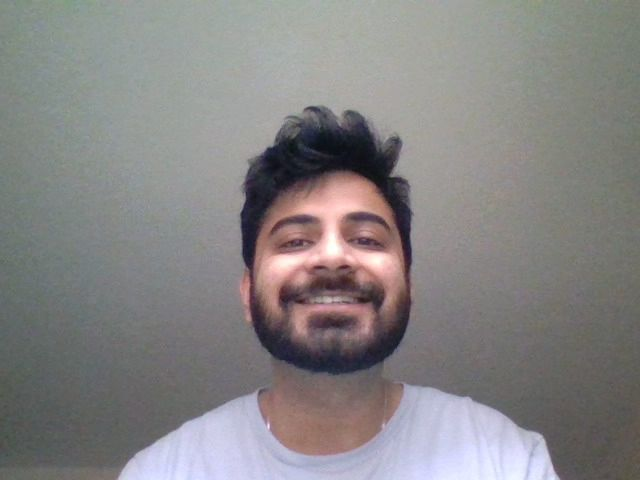

1/1 [==============================] - 0s 187ms/step
Emotion: Happy


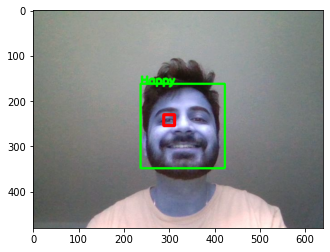

-1

In [ ]:

#loading the model
json_file = open('fer.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("fer.h5")
print("Loaded model from disk")

face_cascade = cv2.CascadeClassifier('/content/gdrive/MyDrive/Colab Notebooks/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/gdrive/MyDrive/Colab Notebooks/haarcascade_eye.xml')


#setting image resizing parameters
WIDTH = 48
HEIGHT = 48
x=None
y=None
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']


from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

#loading image
'''img1 = cv2.imread("/content/index.png")
print("Image Loaded")
gray = cv2.cvtColor( img1 , cv2.COLOR_BGR2GRAY)
face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face.detectMultiScale(gray,1.3,10)'''
# print("lolol",filename)
img1 = cv2.imread(filename)
gray = cv2.cvtColor( img1 , cv2.COLOR_BGR2GRAY)
face = cv2.CascadeClassifier('/content/gdrive/MyDrive/Colab Notebooks/haarcascade_frontalface_default.xml')
faces = face.detectMultiScale(gray,1.3,10)
#detecting faces
for (x, y, w, h) in faces:
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        cv2.normalize(cropped_img, cropped_img, alpha=0, beta=1, norm_type=cv2.NORM_L2, dtype=cv2.CV_32F)
        cv2.rectangle(img1, (x, y), (x + w, y + h), (0, 255, 0), 3)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img1[y:y+h, x:x+w]
        #predicting the emotion
        yhat= loaded_model.predict(cropped_img)
        cv2.putText(img1, labels[int(np.argmax(yhat))], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 3, cv2.LINE_AA)
        print("Emotion: "+labels[int(np.argmax(yhat))])
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,0,0),5) # (roi_color, (xstarting_coord,ystarting_coord),(x_ending_coord,y_ending_coord),thickness)

plt.imshow(img1)
plt.show()
cv2.waitKey()
